Importamos el archivo `all_reviews.csv` que es el que contiene todas las reviews scrapeadas.

In [1]:
import pandas as pd

df = pd.read_csv("./all_reviews.csv")
df.head()

,name,experience,rating,review_text,likes,review_title,Unnamed: 4,Unnamed: 5
0,Vanesa Fraccarolli,4 reseñas · 7 fotos,5 estrellas:,Impecable la experiencia con Flybondi Ida y vu...,NaN,NaN,NaN,NaN
1,Betiana Tetti,Local Guide · 703 reseñas · 3.139 fotos,5 estrellas:,La verdad que siempre que viajé Flybondi fue t...,3.0,NaN,NaN,NaN
2,Valeria Simplituca,22 reseñas · 13 fotos,1 estrellas:,Una vergüenza y un desastre!!! Cambian las con...,4.0,NaN,NaN,NaN
3,Aldana Santandreu,6 reseñas · 6 fotos,5 estrellas:,Tanto el vuelo de ida como de vuelta a Bariloc...,1.0,NaN,NaN,NaN
4,Elian Pinel,Local Guide · 104 reseñas · 422 fotos,5 estrellas:,Viajamos sin ningún tipo de contratiempo a bar...,3.0,NaN,NaN,NaN


Sacamos duplicados.

In [12]:
df = df.dropna(subset=['review_text'])
# drop duplicates
df = df.drop_duplicates(subset=['review_text'])

In [22]:
df.shape[0]

# Using raw string to avoid the invalid escape sequence warning
df['rating_cleaned'] = df['rating'].str.extract(r'(\d+)').astype(float)

# Display the updated dataframe with the cleaned rating
df[['name', 'rating', 'rating_cleaned']].head()



,name,rating,rating_cleaned
0,Vanesa Fraccarolli,5 estrellas:,5.0
1,Betiana Tetti,5 estrellas:,5.0
2,Valeria Simplituca,1 estrellas:,1.0
3,Aldana Santandreu,5 estrellas:,5.0
4,Elian Pinel,5 estrellas:,5.0


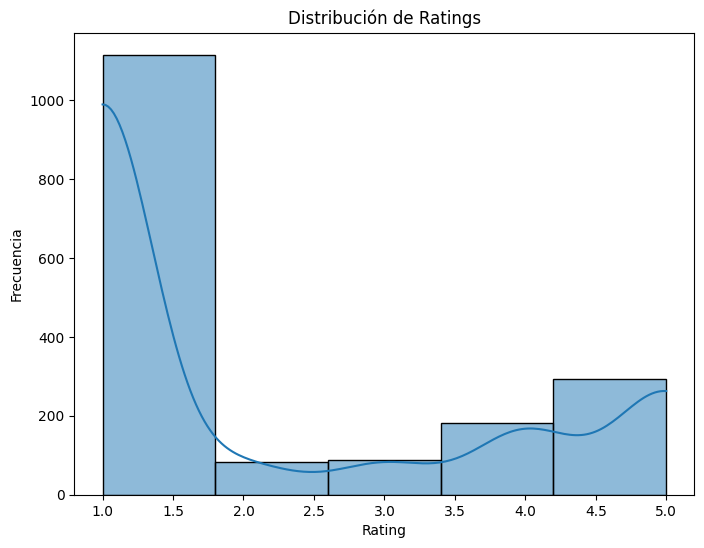

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Let's first check the distribution of the cleaned ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['rating_cleaned'], bins=5, kde=True)
plt.title('Distribución de Ratings')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()


In [ ]:

# 3. Heatmap showing correlation between numerical variables like 'likes' and 'rating_cleaned'
plt.figure(figsize=(8, 6))
corr = df[['rating_cleaned', 'likes']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlación entre Likes y Ratings')
plt.show()

In [20]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
nltk.download('stopwords')

# Usar stopwords en español
stop_words = set(stopwords.words('spanish'))

# Stemming en español con SnowballStemmer
stemmer = SnowballStemmer("spanish")

def preprocess_review(review):
    # Limpieza del texto
    review = re.sub(r"http\S+|www\S+|https\S+", '', review)
    review = re.sub(r'[^\w\s]', '', review)
    review = re.sub(r'\d+', '', review)

    # Convertir a minúsculas
    review = review.lower()

    # Stemming (cuidado con palabras que deben conservar la "s")
    review = " ".join([stemmer.stem(word) for word in review.split() if word not in stop_words])

    return review

# Aplicar preprocesamiento a la columna de reseñas
df['cleaned_reviews'] = df['review_text'].apply(preprocess_review)





[nltk_data] Downloading package stopwords to /home/chris/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
df.head()

,name,experience,rating,review_text,likes,review_title,Unnamed: 4,Unnamed: 5,cleaned_reviews
0,Vanesa Fraccarolli,4 reseñas · 7 fotos,5 estrellas:,Impecable la experiencia con Flybondi Ida y vu...,NaN,NaN,NaN,NaN,impec experient flybondi ida vuelt cordob salt...
1,Betiana Tetti,Local Guide · 703 reseñas · 3.139 fotos,5 estrellas:,La verdad que siempre que viajé Flybondi fue t...,3.0,NaN,NaN,NaN,verd siempr viaj flybondi excelent cordial pun...
2,Valeria Simplituca,22 reseñas · 13 fotos,1 estrellas:,Una vergüenza y un desastre!!! Cambian las con...,4.0,NaN,NaN,NaN,vergüenz desastr cambi condicion tamañ rigidez...
3,Aldana Santandreu,6 reseñas · 6 fotos,5 estrellas:,Tanto el vuelo de ida como de vuelta a Bariloc...,1.0,NaN,NaN,NaN,vuel ida vuelt bariloch vacacion inviern sal h...
4,Elian Pinel,Local Guide · 104 reseñas · 422 fotos,5 estrellas:,Viajamos sin ningún tipo de contratiempo a bar...,3.0,NaN,NaN,NaN,viaj ningun tip contratiemp bariloch principi ...
